In [0]:
# Imports all the required modules function

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 


# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
!mv '/content/gdrive/My Drive/cifar-10-python.tar.gz' '/content/cifar-10-batches-py.tar.gz'

!cp '/content/cifar-10-batches-py.tar.gz' ~/.keras/datasets/

mv: cannot stat '/content/gdrive/My Drive/cifar-10-python.tar.gz': No such file or directory


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

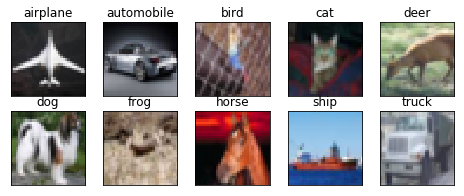

In [12]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
#Function for plotting model history
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# Function for calculating validation test 
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [16]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0623 20:46:22.064087 140575292929920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 20:46:22.081072 140575292929920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 20:46:22.083715 140575292929920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 20:46:22.110630 140575292929920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0623 20:46:22.113202 140575292929920 deprecation_wrapp

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

In [0]:
from keras.callbacks import  ModelCheckpoint  # importing checkpoint

filepath="/content/gdrive/My Drive/EVA_session_6-3.3_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"                                  # filepath in google drive to save weights
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=True)    # checkpoint to monitor validation accuracy, and save which give max accuracy

W0623 20:46:22.466912 140575292929920 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
390/390 [==============================] - 12s 32ms/step - loss: 1.8466 - acc: 0.2982 - val_loss: 1.4725 - val_acc: 0.4611

Epoch 00001: val_acc improved from -inf to 0.46110, saving model to /content/gdrive/My Drive/EVA_session_6-3.3_weights-improvement-01-0.46.hdf5
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.3462 - acc: 0.5128 - val_loss: 1.1470 - val_acc: 0.5871

Epoch 00002: val_acc improved from 0.46110 to 0.58710, saving model to /content/gdrive/My Drive/EVA_session_6-3.3_weights-improvement-02-0.59.hdf5
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1367 - acc: 0.5960 - val_loss: 1.0596 - val_acc: 0.6153

Epoch 00003: val_acc improved from 0.58710 to 0.61530, saving model to /content/gdrive/My Drive/EVA_session_6-3.3_weights-improvement-03-0.62.hdf5
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 1.0086 - acc: 0.6440 - val_loss: 0.9114 - val_acc: 0.6804

Epoch 00004: val_acc 

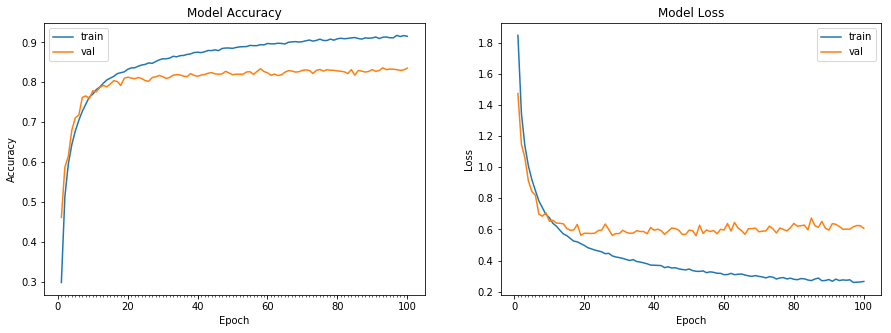

Accuracy on test data is: 83.55


In [19]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), 
                                 callbacks=[checkpoint],verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Below architecture acheived 83.740% validation accuracy in 18 epoch (85.28% accuracy in 100 epoch though) beating baseline accuracy of   83.63% in  above architecture

In [25]:
# Define the model
model = Sequential()
model.add(Convolution2D(64, 3, 3, activation='relu',border_mode='same',input_shape=(32, 32, 3)))  # 30 , 3
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(128, 3, 3,border_mode='same',activation='relu'))  # 28 , 5
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(256, 3, 3,border_mode='same',activation='relu'))  # 26 , 7
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2))) # 13,14
model.add(Convolution2D(40, 1, 1, activation='relu')) 
model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3,border_mode='same',activation='relu'))  # 11 , 16
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(128, 3, 3,border_mode='same',activation='relu'))  # 4 , 18
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(256, 3, 3,border_mode='same',activation='relu'))  # 4 , 20
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2))) # 6, 40
model.add(Convolution2D(40, 1, 1, activation='relu')) 
model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3,border_mode='same',activation='relu'))  # 4 , 42
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(128, 3, 3,border_mode='same',activation='relu'))  # 4 , 42
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(10, 1)) 
# model.add(BatchNormalization())
model.add(Convolution2D(num_classes, 8))
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 256)       295168    
__________

In [0]:
from keras.callbacks import  ModelCheckpoint  # importing checkpoint

filepath="/content/gdrive/My Drive/EVA_session_6-3.5_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"                                  # filepath in google drive to save weights
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=True)    # checkpoint to monitor validation accuracy, and save which give max accuracy

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 54s 137ms/step - loss: 1.4510 - acc: 0.4836 - val_loss: 1.7593 - val_acc: 0.4492

Epoch 00001: val_acc improved from -inf to 0.44920, saving model to /content/gdrive/My Drive/EVA_session_6-3.5_weights-improvement-01-0.45.hdf5
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 50s 128ms/step - loss: 0.9037 - acc: 0.6820 - val_loss: 1.0737 - val_acc: 0.6564

Epoch 00002: val_acc improved from 0.44920 to 0.65640, saving model to /content/gdrive/My Drive/EVA_session_6-3.5_weights-improvement-02-0.66.hdf5
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 50s 129ms/step - loss: 0.6916 - acc: 0.7573 - val_loss: 0.7545 - val_acc: 0.7386

Epoch 00003: val_acc improved from 0.65640 to 0.73860, saving model to /content/

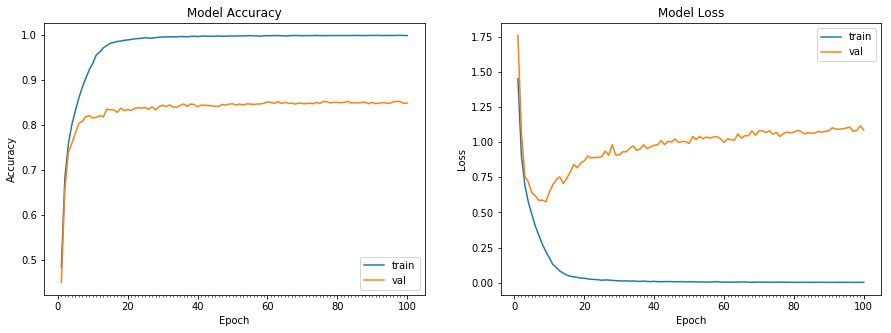

Accuracy on test data is: 84.87


In [28]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),
                                 callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))